In [19]:
from random import seed
from random import randrange
from sklearn import datasets
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import multiprocessing as mp
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

Random forest version 1

In [2]:
class Tree:
    def __init__(self):
        pass
    
    def fit(self,features,X,y):
        self.features = features
        tree_x = X[:,features]
        self.clf = DecisionTreeClassifier()
        self.clf.fit(tree_x,y)
    
    def predict(self,X):
        tree_x = X[:,self.features]
        predictions = self.clf.predict(tree_x)
        return predictions

In [3]:
class RandomForest:
    
    def __init__(self,number_trees,sample_fraction=1):
        self.number_trees = number_trees
        self.sample_fraction = sample_fraction
    
    def fit(self,X,y):
        trees = []
        n_features = int(np.sqrt(len(X[0])))
        n_samples = len(X)*self.sample_fraction
        for _ in range(self.number_trees):
            features = np.random.choice(len(X[0]), n_features,replace=False)
            samples = np.random.choice(len(X),n_samples,replace=False)
            tree_y,tree_x = y[samples], X[samples]
            tree = Tree ()
            tree.fit(features,tree_x,tree_y)
            trees.append(tree)
        self.trees = trees
    
    def predict(self,X):
        prediction_matrix = [[] for _ in range(len(X))]
        for tree in self.trees:
            predictions = tree.predict(X)
            for curr,all_ in zip(predictions,prediction_matrix):
                all_.append(curr)
        final_predictions = []
        for row in prediction_matrix:
            counter = Counter(row)
            prediction = counter.most_common(1)[0][0]
            final_predictions.append(prediction)
        return final_predictions
        

In [8]:
iris = datasets.load_iris()

In [5]:
rf = RandomForest(10000)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target)

In [10]:
rf.fit(X_train,y_train)

In [11]:
preds= rf.predict(X_test)
accuracy_score(preds,y_test)

0.8947368421052632

In [14]:
sklearn_rf = RandomForestClassifier()
sklearn_rf.fit(X_train,y_train)
sklearn_preds = sklearn_rf.predict(X_test)

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [15]:
accuracy_score(sklearn_preds,y_test)

0.868421052631579

In [7]:
max_workers = mp.cpu_count()  
max_workers

8

In [9]:
num_trees = 50000
n_features = int(np.sqrt(len(iris.data[0])))
trees = [Tree() for _ in range(num_trees)]

In [10]:
def fit_tree(tree):
    features = np.random.choice(len(iris.data[0]), n_features,replace=False)
    tree.fit(features,iris.data,iris.target)
    return tree

In [27]:
workers = []
times = []
for num_workers in range(1,max_workers+1):
    workers.append(num_workers)
    pool = mp.Pool(num_workers)
    start = timer()
    pool.map(fit_tree,trees)
    end = timer()
    time = end - start
    times.append(time)
    pool.close()
    pool.join()

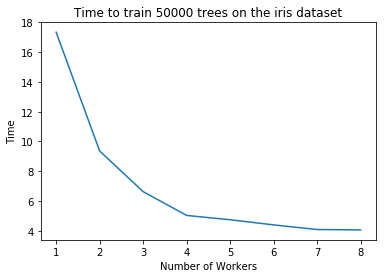

In [12]:
plt.plot(workers,times)
plt.xlabel("Number of Workers")
plt.ylabel("Time")
plt.title("Time to train {} trees on the iris dataset".format(num_trees))
plt.show()

In [192]:
breast = datasets.load_breast_cancer()

In [203]:
num_trees_breast = 8
n_features_breast = int(np.sqrt(len(breast.data[0])))
trees_breast = [Tree() for _ in range(num_trees_breast)]

In [204]:
def fit_tree_breast(tree):
    features = np.random.choice(len(breast.data[0]), n_features_breast,replace=False)
    tree.fit(features,breast.data,breast.target)
    return tree

In [ ]:
breast_workers = []
breast_times = []
for num_workers in range(1,max_workers+1):
    breast_workers.append(num_workers)
    pool = mp.Pool(num_workers)
    start = timer()
    pool.map(fit_tree_breast,trees)
    end = timer()
    time = end - start
    breast_times.append(time)
    pool.close()
    pool.join()

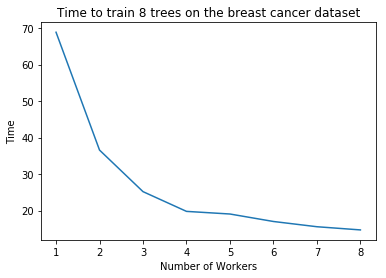

In [208]:
plt.plot(breast_workers,breast_times)
plt.xlabel("Number of Workers")
plt.ylabel("Time")
plt.title("Time to train {} trees on the breast cancer dataset".format(num_trees_breast))
plt.show()

In [40]:
workers_matrix = np.asmatrix([workers]).T

In [32]:
reg = LinearRegression()

In [41]:
reg.fit(workers_matrix,times)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
reg.score(workers_matrix,times)

0.625981798487746